In [5]:
from tarfile import data_filter

import pandas as pd
import numpy as np
import importlib
from datetime import datetime
import matplotlib.pyplot as plt
from matplotlib.pyplot import xticks
from pandas.core.interchange.dataframe_protocol import DataFrame
from pygments.lexer import bygroups

import volpy_func_lib as vp
import load_clean_lib
import table_lib

from datetime import datetime
from volpy_func_lib import load_forward_price

importlib.reload(vp)
importlib.reload(load_clean_lib)
importlib.reload(table_lib)

<module 'table_lib' from 'D:\\Professionelt\\Code\\volpy\\table_lib.py'>

# Load and calculate everything

In [6]:
IV_types = ["om"]
data_folder = "i4s4"
profile = "Mads"
ticker_list = ["SPX", "OEX"]

# Load data and clean
od, returns_and_prices = load_clean_lib.load_clean_and_prepare_od(data_folder = data_folder, profile = profile, tickers = ticker_list, first_day = None, last_day = None)

# Calculate results such as SW, RV ect.
summary_dly_df, od_rdy = load_clean_lib.create_summary_dly_df(od, returns_and_prices, first_day = None, last_day = None, IV_types = IV_types)

Processing Groups: 100%|██████████| 7204/7204 [00:06<00:00, 1193.31it/s]


## Save/Load CSV

In [7]:
# # Save
# date_str = datetime.now().strftime("%Y-%m_%d_%H-%M")
# summary_dly_df.to_csv(f"data/summary_dly_df {date_str}.csv")
# od_rdy.to_csv(f"data/od_rdy {date_str}.csv")

# # Load
# summary_dly_df = pd.read_csv(f"data/summary_dly_df {date_str}.csv")
# od_rdy = pd.read_csv(f"data/od_rdy {date_str}.csv")

# # Load another
# summary_dly_df = pd.read_csv(f"data/summary_dly_df 2025-03_11_11-44.csv")

## Only keep if not Swap is NA

In [8]:
summary_dly_df = summary_dly_df[summary_dly_df["SW_0_30"].notna()]

In [9]:
summary_dly_df = summary_dly_df.reset_index()

In [10]:
# summary_dly_df_CarrWu_tickers = summary_dly_df[summary_dly_df["ticker"].isin(table_lib.CarrWu_tickers())]
# summary_dly_df_CarrWu_tickers_yr = summary_dly_df_CarrWu_tickers[to_datetime(summary_dly_df_CarrWu_tickers["date"]) <= pd.to_datetime("2003-02-28")]

## Table 1 (Aktive dage)

In [10]:
importlib.reload(table_lib)
table_lib.CarrWu2009_table_1(summary_dly_df, print_latex = False)

,ticker,Starting_date,Ending_date,N,NK
1,SPX,04-Jan-1996,28-Feb-2003,1801,31.923098
0,OEX,04-Jan-1996,28-Feb-2003,1801,31.911438


## Table 2 (SW og RV)

In [11]:
table_lib.CarrWu2009_table_2(summary_dly_df, print_latex = False) # , print_latex = True

,ticker,Mean_RV,Std_RV,Auto_RV,Skew_RV,Kurt_RV,Mean_SW,Std_SW,Auto_SW,Skew_SW,Kurt_SW
1,SPX,4.096837,3.364648,0.985650,2.105232,5.104466,5.822859,3.181829,0.959574,1.813065,4.149287
0,OEX,4.567990,3.743152,0.985535,2.028253,4.654040,6.074986,3.210560,0.964468,1.617449,2.901213


## Table 3 (SW - RV og SW/RV)

In [4]:
importlib.reload(table_lib)
table_lib.CarrWu2009_table_3(summary_dly_df, print_latex = False)

NameError: name 'summary_dly_df' is not defined

In [69]:
summary_dly_df = summary_dly_df.reset_index()

In [122]:
SPX = summary_dly_df[summary_dly_df["ticker"] == "SPX"].reset_index(drop = True)
SPX = SPX[SPX["SW_return_day"].isna() == False]

In [139]:
SPX_p1 = SPX[SPX["date"].dt.year <= 2008]

In [140]:
SPX_p2 = SPX[SPX["date"].dt.year > 2008]

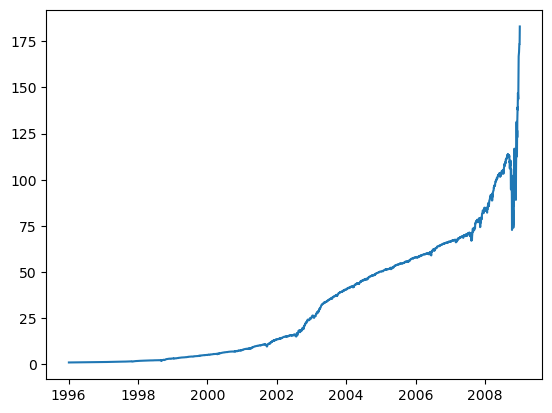

In [141]:
plt.plot(SPX_p1["date"], np.cumprod(1-SPX_p1["SW_return_day"]))
plt.show()

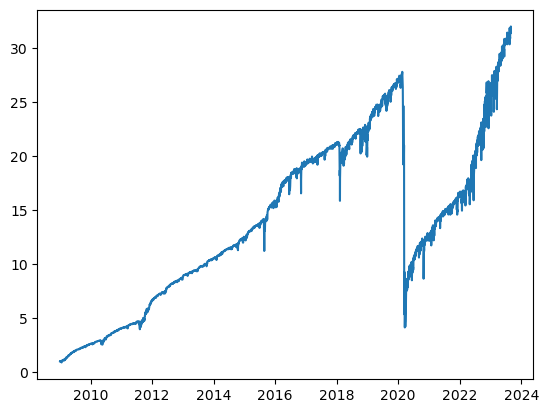

In [142]:
plt.plot(SPX_p2["date"], np.cumprod(1-SPX_p2["SW_return_day"]))
plt.show()

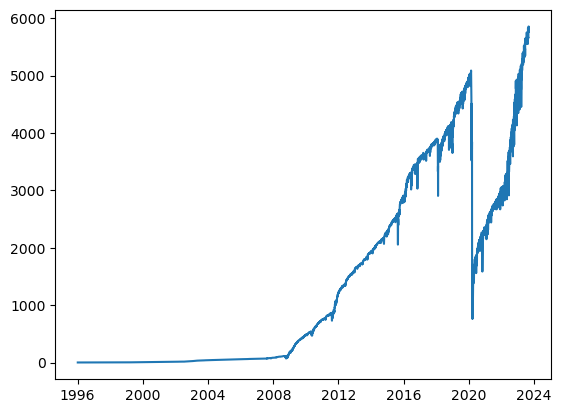

In [132]:
plt.plot(SPX["date"], np.cumprod(1-SPX["SW_return_day"]))
plt.show()

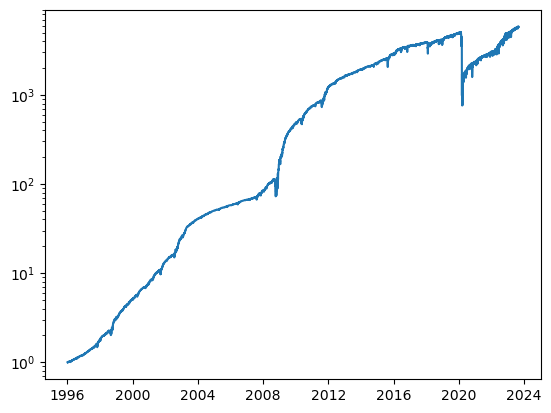

In [143]:
plt.plot(SPX["date"], np.cumprod(1-SPX["SW_return_day"]))
plt.yscale("log")
plt.show()

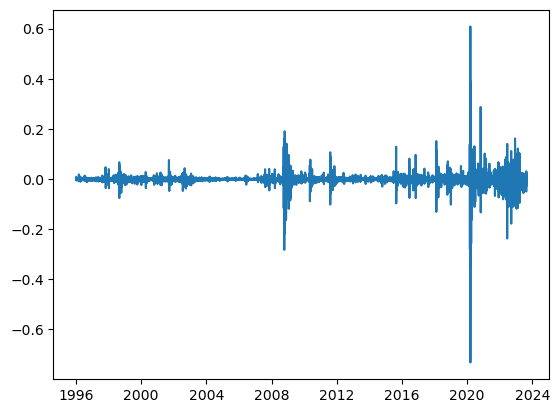

In [97]:
plt.plot(SPX["date"], SPX["SW_return_day"])
plt.show()

In [79]:
min(1 + SPX["SW_return_day_scaled"].dropna())

0.01585421600092385

In [47]:
summary_dly_df = summary_dly_df[summary_dly_df["SW_return_day"].isna() == False]

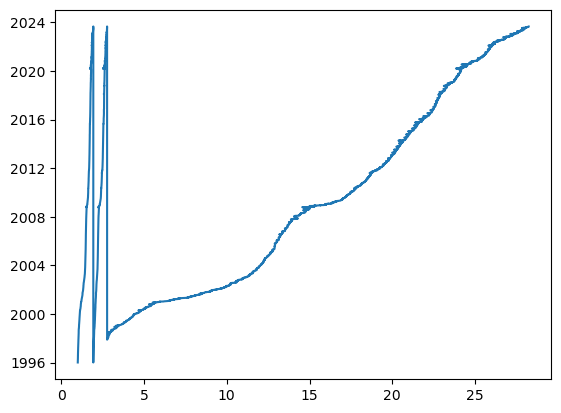

In [50]:
plt.plot(summary_dly_df["date"], (1-(1/30)*summary_dly_df["SW_return_day"]).cumprod())

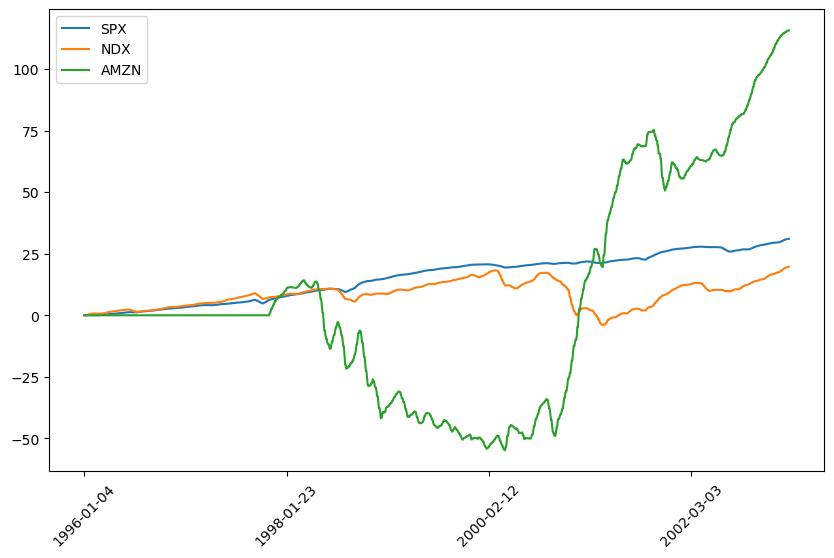

In [24]:
# Convert the 'date' column to datetime
summary_dly_df["date"] = pd.to_datetime(summary_dly_df["date"])

# Create a global date range that covers all dates in your DataFrame.
all_dates = pd.date_range(start=summary_dly_df["date"].min(), 
                          end=summary_dly_df["date"].max(), freq="D")

import matplotlib.pyplot as plt
import numpy as np

ticker_list = ["SPX", "AMZN", "NDX", "TSLA"]
ticker_list = ["SPX", "NDX", "QQQ"]
ticker_list = ["SPX", "NDX", 'AMZN']


plt.figure(figsize=(10, 6))

for ticker in ticker_list:
    # Filter and set the date as index
    df_ticker = summary_dly_df[summary_dly_df["ticker"] == ticker].copy()
    df_ticker.set_index("date", inplace=True)

    # Calculate the daily returns
    returns = df_ticker["SW_0_30"] - df_ticker["RV"]

    # Reindex the returns to the complete date range, filling missing days with 0
    returns = returns.reindex(all_dates, fill_value=0)

    # Compute the cumulative return
    cum_ret = returns.cumsum()

    # Plot cumulative returns for this ticker
    plt.plot(all_dates, cum_ret, label=ticker)

# Set x-ticks to display one label every 1000 days, rotated for better readability
plt.xticks(all_dates[::750], rotation=45)
plt.legend()
plt.show()

## Table 4 (CAPM alpha regression)

## Table 5 (Fama-French alpha regression)

## Table 6 (Constant SW premium test)

## Table 10 (2 subsamples SW/RV ect.)